# Preprocessing of Car Sales Dataset in Kazakhstan for the Year 2019



This is the pet project for the Kazakhstan car market in the year 2019
There are many gaps, implicit duplicates, misprints and shifts in dataset.

Here is the first part of the project. The goal is to edit the dataframe, (to the maximum extent) fill in the gaps and missing data, and convert all columns to the correct datatype.

The data consists of information about car dealers, details about sold cars, characteristics, prices, and sales regions.

## Data preprocessing 

In [13]:
pip install gdown

Note: you may need to restart the kernel to use updated packages.


In [119]:
# Connecting and loading  all necessary libraries
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import graph_objects as go
#import requests
from io import StringIO
import gdown

sns.set(style="darkgrid")


In [120]:

# Google Drive link to the file
file_url = 'https://drive.google.com/uc?id=1I0XgNP8LmKrN8YeW-tE11VS7lgjF3WRI'

# Loading the file in CSV format
gdown.download(file_url, 'data.csv', quiet=False)

data = pd.read_csv('data.csv', sep = ';',decimal=',')

Downloading...
From: https://drive.google.com/uc?id=1I0XgNP8LmKrN8YeW-tE11VS7lgjF3WRI
To: /Users/Santonica/data.csv
100%|██████████████████████████████████████| 14.2M/14.2M [00:00<00:00, 21.5MB/s]


In [121]:
# What does the data consist of?
data.head()

,Год,Месяц,Компания,Бренд,Модель,Модификация,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",...,Тип клиента,Форма расчета,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Сегментация Eng,Локализация производства
0,2019,Май,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",...,Физ. Лицо,безналичный,1.0,28115.00,28115.00,г.Алматы,Легковые автомобили,C класс,C,Импорт
1,2019,Август,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",...,Юр. Лицо,наличный,1.0,32246.99,32246.99,г.Алматы,Легковые автомобили,C класс,C,Импорт
2,2019,Апрель,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",...,Физ. Лицо,безналичный,1.0,32000.00,32000.00,г.Алматы,Легковые автомобили,D класс,D,Импорт
3,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",...,Юр. Лицо,безналичный,1.0,31929.00,31929.00,г.Алматы,Легковые автомобили,D класс,D,Импорт
4,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",...,Физ. Лицо,наличный,1.0,31929.00,31929.00,г.Алматы,Легковые автомобили,D класс,D,Импорт


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39966 entries, 0 to 39965
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Год                             39966 non-null  int64  
 1   Месяц                           39966 non-null  object 
 2   Компания                        39966 non-null  object 
 3   Бренд                           39966 non-null  object 
 4   Модель                          39966 non-null  object 
 5   Модификация                     36375 non-null  object 
 6   Год выпуска                     39465 non-null  object 
 7   Страна-производитель            39966 non-null  object 
 8   Вид топлива                     36826 non-null  object 
 9   Объём двиг, л,                  35708 non-null  object 
 10  Коробка передач                 36711 non-null  object 
 11  Тип привода                     35677 non-null  object 
 12  Сегмент                         

Observations on the provided data reveal the following:

- Many columns contain missing values.
- The datatype is predominantly object, with one int and one float.
- The dataset comprises 39,966 rows and 25 columns.

### Columns

Column standardization: translation, lowercase conversion, and removing spaces

In [19]:
data = data.rename(columns = {
    'Год': 'year',
    'Месяц': 'month',
    'Компания': 'company',
    'Бренд': 'brand',
    'Модель': 'model',
    'Модификация': 'modification',
    'Год выпуска': 'year_of_manufacture',
    'Страна-производитель': 'country_of_manufacture',
    'Вид топлива': 'type_of_fuel',
    'Объём двиг, л,': 'engine_volume_l',
    'Коробка передач': 'gearbox',
    'Тип привода': 'drive_type',
    'Сегмент': 'segment',
    'Регион': 'region',
    'Наименование дилерского центра': 'dealership_name',
    'Тип клиента': 'client_type',
    'Форма расчета': 'calculation_form',
    'Количество': 'quantity',
    'Цена, USD': 'price_usd',
    'Продажа, USD': 'sale_usd',
    'Область': 'area',
    'Сегментация 2013': 'segmentation_2013',
    'Класс 2013': 'class_2013',
    'Сегментация Eng': 'segmentation_eng',
    'Локализация производства': 'localization_of_production'
})

In [20]:
#display(data)

In [21]:
data.columns

Index(['year', 'month', 'company', 'brand', 'model', 'modification',
       'year_of_manufacture', 'country_of_manufacture', 'type_of_fuel',
       'engine_volume_l', 'gearbox', 'drive_type', 'segment', 'region',
       'dealership_name', 'client_type', 'calculation_form', 'quantity',
       'price_usd', 'sale_usd', 'area', 'segmentation_2013', 'class_2013',
       'segmentation_eng', 'localization_of_production'],
      dtype='object')

In [22]:
start_shape = data.shape # DataFrame size
start_shape_rows = data.shape[0]
print(start_shape)
print(start_shape_rows)

(39966, 25)
39966


The client mentioned that the following columns can be removed as they don't influence the analysis result. 

In [23]:
data = data.drop(['calculation_form','segment','localization_of_production'],axis=1)

### Changing data types

In [24]:
data.columns

Index(['year', 'month', 'company', 'brand', 'model', 'modification',
       'year_of_manufacture', 'country_of_manufacture', 'type_of_fuel',
       'engine_volume_l', 'gearbox', 'drive_type', 'region', 'dealership_name',
       'client_type', 'quantity', 'price_usd', 'sale_usd', 'area',
       'segmentation_2013', 'class_2013', 'segmentation_eng'],
      dtype='object')

In [25]:
str_col = ['company', 'brand', 'model', 'country_of_manufacture', 'type_of_fuel',
           'gearbox', 'segmentation_eng', 'region', 'dealership_name', 'client_type','area', 'segmentation_2013' ]
for column in str_col:
    data[column] = data[column].astype(str)

Let's attempt to convert all the following columns to the string datatype.

In [26]:
display(data)

,year,month,company,brand,model,modification,year_of_manufacture,country_of_manufacture,type_of_fuel,engine_volume_l,...,region,dealership_name,client_type,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,segmentation_eng
0,2019,Май,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",...,Алматы,Mercur Auto Алматы,Физ. Лицо,1.0,28115.00000,28115.00000,г.Алматы,Легковые автомобили,C класс,C
1,2019,Август,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",...,Алматы,Mercur Auto Алматы,Юр. Лицо,1.0,32246.99000,32246.99000,г.Алматы,Легковые автомобили,C класс,C
2,2019,Апрель,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",...,Алматы,Mercur Auto Алматы,Физ. Лицо,1.0,32000.00000,32000.00000,г.Алматы,Легковые автомобили,D класс,D
3,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",...,Алматы,Mercur Auto Алматы,Юр. Лицо,1.0,31929.00000,31929.00000,г.Алматы,Легковые автомобили,D класс,D
4,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",...,Алматы,Mercur Auto Алматы,Физ. Лицо,1.0,31929.00000,31929.00000,г.Алматы,Легковые автомобили,D класс,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39961,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,Республика Казахстан,Дизель,NaN,...,Актобе,ЗапКазКАМАЗ -Актобе,Юр. Лицо,1.0,48756.92071,48756.92071,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,O
39962,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,Республика Казахстан,Дизель,NaN,...,Актобе,ЗапКазКАМАЗ -Актобе,Юр. Лицо,1.0,48756.92071,48756.92071,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,O
39963,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,Республика Казахстан,Дизель,NaN,...,Актобе,ЗапКазКАМАЗ -Актобе,Юр. Лицо,1.0,48756.92071,48756.92071,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,O
39964,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,Республика Казахстан,Дизель,NaN,...,Актобе,ЗапКазКАМАЗ -Актобе,Юр. Лицо,1.0,48756.92071,48756.92071,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,O


In [27]:
# Replacement of commas with periods in float values and conversion to float datatype
num_col = ['quantity', 'price_usd','sale_usd']
for column in num_col:
    data[column] = data[column].astype(str)
    data[column] = data[column].str.replace(',','.').astype(float).round(2)



In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39966 entries, 0 to 39965
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    39966 non-null  int64  
 1   month                   39966 non-null  object 
 2   company                 39966 non-null  object 
 3   brand                   39966 non-null  object 
 4   model                   39966 non-null  object 
 5   modification            36375 non-null  object 
 6   year_of_manufacture     39465 non-null  object 
 7   country_of_manufacture  39966 non-null  object 
 8   type_of_fuel            39966 non-null  object 
 9   engine_volume_l         35708 non-null  object 
 10  gearbox                 39966 non-null  object 
 11  drive_type              35677 non-null  object 
 12  region                  39966 non-null  object 
 13  dealership_name         39966 non-null  object 
 14  client_type             39966 non-null

## Duplicates

In [29]:
print('Number of duplicates = ',data.duplicated().sum())

Number of duplicates =  19275


In [30]:
data_clear = data.drop_duplicates().reset_index(drop=True)

In [31]:
size = data.shape[0]
lost = data.shape[0]-data_clear.shape[0]
print(f'Losses = {round(lost*100/size,2)}%')

Losses = 48.23%


Dropping all explicit duplicates would result in losing almost half of the dataset, which is unacceptable. Additionally, the client clarified that the dataset is not personalized, and many rows are repeated. There would be significantly fewer duplicates if the client identifier parameter had been entered.

### Data preprocessing

Print a histogram of the dataset to preview the data.

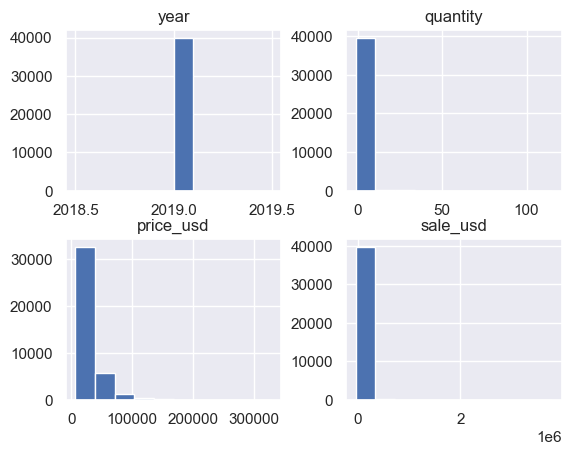

In [32]:
data.hist();

### Sequence correction of each column.

### Year

Artifacts or missing values not found.

In [33]:
data['year'].value_counts()

2019    39966
Name: year, dtype: int64

### Month

In [34]:
data['month'].value_counts()
# data['месяц'].hist(bins=8,figsize=(11,5))

Июль        5930
Сентябрь    5312
Август      4812
Май         4798
Июнь        4754
Апрель      4177
Март        3662
Январь      3384
Февраль     3137
Name: month, dtype: int64

In [35]:
# Replace the month names with their corresponding numerical representations
month = { 'Январь': 1,
         'Февраль': 2,
         'Март': 3,
         'Апрель': 4,
         'Май': 5,
         'Июнь': 6,
         'Июль': 7,
         'Август': 8,
         'Сентябрь': 9,
         'Октябрь': 10,
         'Ноябрь': 11,
         'Декабрь': 12
        }

In [36]:
data['month_num'] = data['month'].map(month)

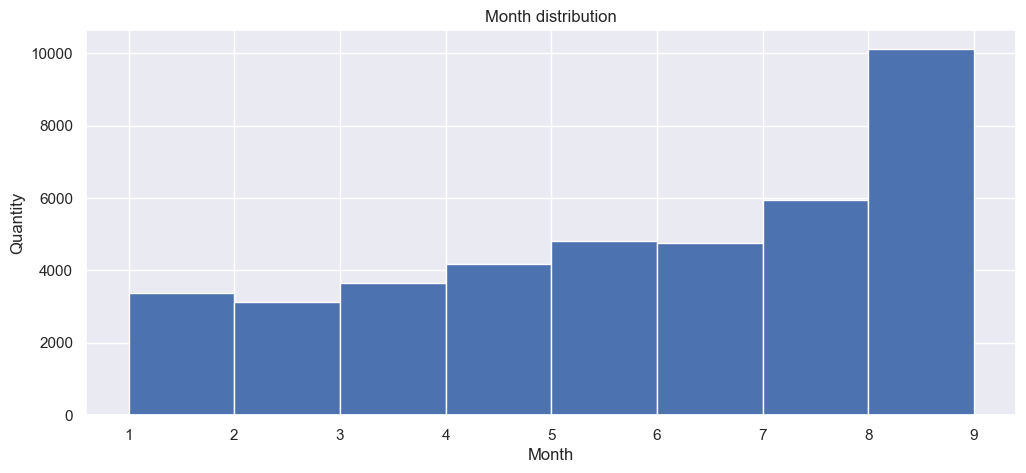

In [37]:
data['month_num'].hist(bins = 8, figsize=(12,5))

plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Month distribution')

plt.show()

### Company

Вring company names to a single standard.

In [38]:
data['company'] = data['company'].str.strip()
data['company'] = data['company'].replace({'Mercur Autos':'Mercur Auto',
            'ММС Рус':'MMC RUS',
            'Caspian Motors':'Каспиан Моторс',
            'Равон Моторс Казахстан':'Ravon Motors Kazakstan','Казахстан':'Kazakstan','RUS':'Рус',
            'Хино Моторс Kazakstan':'Hino Motors'}, regex=True)

In [39]:
data.groupby('company')['month'].count()

company
Allur Auto                       2526
Almaty Motors Premium              94
Astana Motors                   10169
Autokapital                        85
Daewoo Bus Kazakhstan              10
Eurasia Motor Premium             102
Hino Motors                         2
Hyundai Com Trans Kazakhstan      155
MAN Truck & Bus Kazakhstan          6
MMC RUS                           408
MMC Рус                             2
Mercur Auto                       643
Nissan Manufacturing Рус         1149
Ravon Motors Kazakstan           1506
Renault Россия                   1796
Scandinavian Motors                42
Scania Central Asia                12
Subaru Kazakhstan                 503
TERRA MOTORS                       77
Toyota Motor Kazakhstan         11951
Volkswagen Group Rus              109
Автодом Motors KST                 53
Автокапитал                        33
Автомир ГК                        112
Автомир-Центр                      34
Автоцентр-Бавария                 224
БИПЭ

### Brand

Artifacts or missing values not found.

In [40]:
data.groupby('brand')['month'].agg('count')

brand
ANKAI                     300
Audi                       52
BMW                       209
Cadillac                   72
Chevrolet                 635
Daewoo                     10
Dong Feng                  10
Ford                        3
Foton                      28
GAZ                      1821
Hino                       41
Hyundai                 10168
Hyundai Truck & Bus       155
Infiniti                   96
Isuzu                     198
Iveco                      25
Jac                      1991
Jaguar                     36
KAMAZ                     892
Kia                       832
Lada                     1969
Land Rover                135
Lexus                    1206
Lifan                     233
MAN                        11
Mazda                     112
Mercedes-Benz              94
Mercedes-Benz Trucks       24
Mini                       15
Mitsubishi                410
Nefaz                       1
Nissan                   1053
Peugeot                    29
Pors

#### Model

Artifacts or missing values not found.

In [41]:
data['model'].value_counts()

Camry      4853
Tucson     3271
Accent     2211
Elantra    2062
Creta      1775
           ... 
F-Type        1
XE            1
iev           1
4311          1
RS5           1
Name: model, Length: 273, dtype: int64

#### Modification

"The column modification contains many missing values. It's not possible to fill these missing values based on indirect data. As a result, the modification column will not participate in the analysis. It's acceptable to leave NaN (missing) values as they are. Perhaps this data will be useful later.

In [42]:
data['modification'].isna().sum() # quantity of nan

3591

In [43]:
data['modification'].value_counts()

B5                                  1470
BX                                  1210
54                                  1007
Hyundai Elantra AD FL Active         764
Luxury 1.6 MT                        744
                                    ... 
GAZ ГАЗ-330252-750 грузововй 1,5       1
GAZ  СемАЗ 330202 грузовой 1,5т        1
GAZ  СемАЗ 330232 грузовой 1,5т        1
GAZ ГАЗ-322173-753 грузовой 1,5т       1
SUT16PA5RB                             1
Name: modification, Length: 1383, dtype: int64

### Year of manufacture

The year of manufacture contains a non-breaking space '\xa0'. Let's replace it.

In [44]:
data['year_of_manufacture'] = data['year_of_manufacture'].str.strip()
data['year_of_manufacture'] = data['year_of_manufacture'].replace({'\xa0':''}, regex = True)

In [45]:
data['year_of_manufacture'].value_counts()

2019    30026
2018     9081
2017      324
2016       30
2014        2
2013        1
2011        1
Name: year_of_manufacture, dtype: int64

### Country of manufacture

Artifacts or missing values not found.

In [46]:
#data['country_of_manufacture'].value_counts()

### Type of fuel

The information about the type of fuel is filled inconsistently; let's bring it to a uniform format.

In [47]:
data['type_of_fuel'] = data['type_of_fuel'].str.strip() #removing extra spaces
data['type_of_fuel'] = data['type_of_fuel'].str.lower()
data['type_of_fuel'] = data['type_of_fuel'].replace({'электро':'электричество'})

In [48]:
shift_data = data.query('type_of_fuel == "2" or type_of_fuel == "1,6" or type_of_fuel == "0"')
#display(shift_data)

As a result of data processing, a shift was detected in the 'type_of_fuel' column where data from 'engine_volume_l' ended up, and in the 'engine_volume_l' data, there were values from 'gearbox'. Let's shift these cells to the left to restore the data.

In [49]:
for index, row in data.iterrows():
    if row['type_of_fuel'] == "2" or row['type_of_fuel'] == "1,6"  or row['type_of_fuel'] == "0":
        data.at[index, 'gearbox'] = row['engine_volume_l']
        data.at[index, 'engine_volume_l'] = row['type_of_fuel']
        data.at[index, 'type_of_fuel'] = np.nan


In [50]:
shift_data = data.query('type_of_fuel == "2" or type_of_fuel == "1,6" or type_of_fuel == "0"')
display(shift_data) # the shift was completed successfully

,year,month,company,brand,model,modification,year_of_manufacture,country_of_manufacture,type_of_fuel,engine_volume_l,...,dealership_name,client_type,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,segmentation_eng,month_num


In [51]:
data['type_of_fuel'].value_counts()


бензин           34960
nan               3140
дизель            1803
электричество       13
гибрид              10
Name: type_of_fuel, dtype: int64

We will fill in the missing values in the 'type_of_fuel' column based on the car modifications. For some modifications where information could not be found, they will be deleted.

In [52]:
# data[data['type_of_fuel']=='2']
modif = ['E2GB4AG','E2GB4AGA','E1FB4AGA', 'E1FB4AG', 'E2PGB4AGA', 'E1FB4JA', 'E1FB2JA', 'SXP16K5RB']
for e in modif:
    data.loc[data['modification']== e,'type_of_fuel'] = 'бензин'

delet = ['SXP16PA5RB', 'E0DB2JA','SUT16PA5RB', '3741', ]

#data = data[-data['modification'].isin(delet)]

Остальные значения востановим по косвенным признакам, например по модификации автомобиля, там где модификация не определена возьмем моду по моделе.

In [53]:
for t in data['modification'].unique():
    data.loc[(data['modification'] == t) & (data['type_of_fuel']=='nan'), 'type_of_fuel'] = \
    data.loc[(data['modification'] == t), 'type_of_fuel'].mode()

In [54]:
for t in data['model'].unique():
    data.loc[(data['model'] == t) & (data['type_of_fuel']=='nan'), 'type_of_fuel'] = \
    data.loc[(data['model'] == t), 'type_of_fuel'].mode()

In [55]:
data[data['type_of_fuel']=='nan']
# There are no missing values

,year,month,company,brand,model,modification,year_of_manufacture,country_of_manufacture,type_of_fuel,engine_volume_l,...,dealership_name,client_type,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,segmentation_eng,month_num


In [56]:
fuel_translator = {
    'бензин': 'gasoline',
    'дизель' : 'diesel',
    'электричество': 'electricity', 
    'гибрид' : 'hybrid',
    }
data['type_of_fuel'] = data['type_of_fuel'].map(fuel_translator)

In [57]:
data['type_of_fuel'].value_counts()
#data.loc[data['modification']=='3741']

gasoline       35064
diesel          1803
electricity       13
hybrid            10
Name: type_of_fuel, dtype: int64

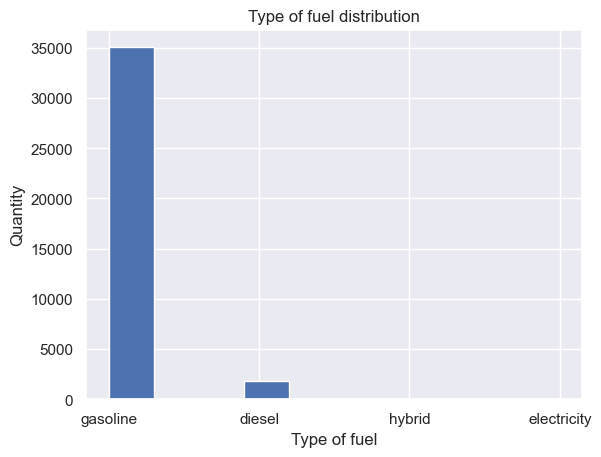

In [58]:
data['type_of_fuel'].hist()
plt.xlabel('Type of fuel')
plt.ylabel('Quantity')
plt.title('Type of fuel distribution')

plt.show()

The moust of cars have gasoline type of fuel.

### Еngine volume

In [59]:
data['engine_volume_l'].value_counts().head()

1,6    5351
2      5120
2,7    3394
2.5    2641
2,5    2385
Name: engine_volume_l, dtype: int64

In [60]:
data['engine_volume_l'] = data['engine_volume_l'].str.replace(',','.')
# remove all characters except digits.
data["engine_volume_l"] = data["engine_volume_l"].str.replace(r"[^\d\.]", "", regex=True)
# removing extra spaces
data['engine_volume_l'] = data['engine_volume_l'].str.strip()
# removing extra points
data['engine_volume_l'] = data['engine_volume_l'].str.replace('\.$', '', regex=True)

# перевод формата данных
#data['engine_volume_l'] = data['engine_volume_l'].astype(float)


In [61]:
data['engine_volume_l'] = data['engine_volume_l'].str.strip()

There is no engine volume information available for 38 rows. A closer examination reveals that these entries correspond to three specific car models: Renault Duster, Toyota Corolla, and Toyota Hilux DC. According to internet sources, the engine volume for Renault Duster ranges from 1.3 to 2.0 liters, for Toyota Hilux DC it is 2.982 liters, and for Toyota Corolla it ranges from 1.1 to 2.4 liter

In [62]:
data.loc[(data['model'] == 'Duster') & (data['engine_volume_l'].isna()), 'engine_volume_l'] = 2
data.loc[(data['model'] == 'Duster') & (data['type_of_fuel'].isna()), 'type_of_fuel'] = 'gasoline'

data.loc[31148:31149, 'engine_volume_l'] = 2
data.loc[32670, 'engine_volume_l'] = 2.982
data.loc[33070, 'engine_volume_l'] = 2.982


In [63]:
#data.loc[data['model'] == 'HILUX DC']

In [64]:
# data.loc[data['engine_volume_l'] == '', 'engine_volume_l'] = np.nan
data['engine_volume_l'] = data['engine_volume_l'].astype(float)

The engine volume can't be bigger than 15 liters. Let's check which models exceed this criteria.

In [65]:
Niva_mode = data[data['model'] == 'Niva']
#print(Niva_mode['engine_volume_l'].mode())
#print(Niva_mode['engine_volume_l'].value_counts())

data.loc[data['model'] == '4x4', 'model']= 'Niva'
data.loc[data['model'] == 'Niva', 'engine_volume_l']= 1.7

An error was found for the 'Niva' model; let's change it to 1.7.
All models with engine volumes exceeding 15 liters are electric cars. They will be classified into a special group through categorization.

In [66]:
data[data['engine_volume_l'] > 15]

,year,month,company,brand,model,modification,year_of_manufacture,country_of_manufacture,type_of_fuel,engine_volume_l,...,dealership_name,client_type,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,segmentation_eng,month_num
39544,2019,Февраль,Almaty Motors Premium,Jaguar,I-Pace,ЭЛЕКТРОКАР,2019,UK,electricity,400.0,...,Almaty Motors Premium,Физ. Лицо,1.0,117236.97,117236.97,г.Алматы,Внедорожники,Компактные SUV,K1,2
39545,2019,Апрель,Almaty Motors Premium,Jaguar,I-Pace,ЭЛЕКТРОКАР,2019,UK,electricity,400.0,...,Almaty Motors Premium,Физ. Лицо,1.0,105388.79,105388.79,г.Алматы,Внедорожники,Компактные SUV,K1,4
39546,2019,Июнь,Almaty Motors Premium,Jaguar,I-Pace,ЭЛЕКТРОКАР,2019,UK,electricity,400.0,...,Almaty Motors Premium,Юр. Лицо,1.0,120413.28,120413.28,г.Алматы,Внедорожники,Компактные SUV,K1,6
39818,2019,Июль,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,Республика Казахстан,electricity,88.0,...,Allur Auto Almaty,Юр. Лицо,1.0,307986.36,307986.36,Костанайская область,Коммерческие автомобили,Большие автобусы,O,7
39819,2019,Июль,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,Республика Казахстан,electricity,88.0,...,Allur Auto Almaty,Юр. Лицо,1.0,307986.36,307986.36,Костанайская область,Коммерческие автомобили,Большие автобусы,O,7
39820,2019,Июль,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,Республика Казахстан,electricity,88.0,...,Allur Auto Almaty,Юр. Лицо,1.0,307986.36,307986.36,Костанайская область,Коммерческие автомобили,Большие автобусы,O,7
39821,2019,Июль,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,Республика Казахстан,electricity,88.0,...,Allur Auto Almaty,Юр. Лицо,1.0,307986.36,307986.36,Костанайская область,Коммерческие автомобили,Большие автобусы,O,7
39822,2019,Июль,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,Республика Казахстан,electricity,88.0,...,Allur Auto Almaty,Юр. Лицо,1.0,307986.36,307986.36,Костанайская область,Коммерческие автомобили,Большие автобусы,O,7
39823,2019,Июль,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,Республика Казахстан,electricity,88.0,...,Allur Auto Almaty,Юр. Лицо,1.0,307986.36,307986.36,Костанайская область,Коммерческие автомобили,Большие автобусы,O,7
39824,2019,Июль,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,Республика Казахстан,electricity,88.0,...,Allur Auto Almaty,Юр. Лицо,1.0,307986.36,307986.36,Костанайская область,Коммерческие автомобили,Большие автобусы,O,7


In [67]:
data['engine_volume_l'].value_counts().head()

2.0    8586
1.6    7778
2.5    5034
2.7    4668
1.5    1423
Name: engine_volume_l, dtype: int64

As a result of data preprocessing, all engine volumes have been standardized, except for electric engines, which will be categorized separately category.

#### Engine volume categorization

In [68]:
def categories(engine):
    if engine < 1.1:
        return 'extra_small'
    if 1.1 <= engine < 1.8:
        return 'small'
    if 1.8 <= engine < 3.5:
        return 'medium'
    if 3.5 <= engine <= 15.0:
        return 'large'
    if engine > 15.0:
        return 'electro'


In [69]:
data['engine_category'] = data['engine_volume_l'].apply(categories)

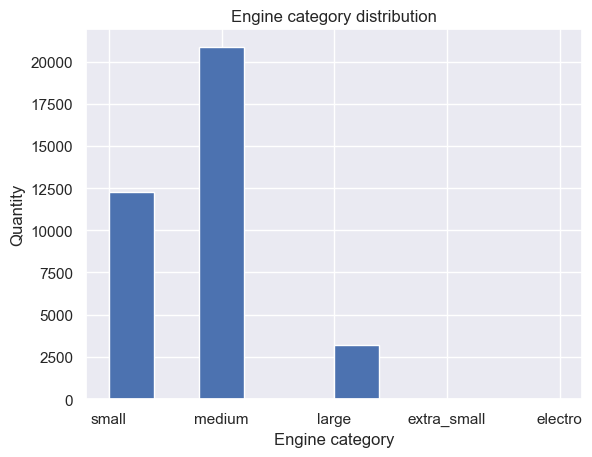

In [70]:
data['engine_category'].hist()
plt.xlabel('Engine category')
plt.ylabel('Quantity')
plt.title('Engine category distribution')

plt.show()

### Gearbox

In [71]:
data['gearbox'] = data['gearbox'].str.strip()

In [72]:
data['gearbox'].unique()

array(['S-tronic', 'S-Tronic', 'Tiptronic', 'АКПП', 'АКП', 'Steptronic',
       'AT', '6 АТ', '5 МТ', '6АТ', 'MT', '8AT', '5МТ', 'Powershift S6',
       '6AT', 'nan', 'Мех.', '6 AT', '6 MT', '6MT', '5 AT', '5AT', 'МКПП',
       '7 DCT', '7DCT', '8 AT', 'МТ', 'CVT', 'DCT', '4 АТ', '6 МТ', '6МТ',
       '4АТ', '4AT', '8АТ', '8 АТ', '5MT', 'AMT', 'CVT (вариатор)',
       'CVT (вариATор)', 'CVT(вAриATор)', '7G-TRONIC', '9G-TRONIC',
       '12AT', '12АТ', '5АТ', '7АТ', '7AT', '6M/T', 'PDK', '8-ступ АКПП',
       '8', '8АКПП', '8 АКПП Tiptronic S', '7 АКПП (PDK)', '7 АКПП PDK',
       '8 АКПП (PDK)', 'АТ', 'АT', 'МT', '0', '7 DSG', '7DSG', '6 DSG',
       '6DSG', '#Н/Д', '2,693', 'DSG', '6A', '6А', '5M', 'A/T', 'M/T',
       'МКП', '5М', 'М/T', '7 АКП', '7АКП', 'А/T', '8A', 'TDI', '9AT',
       'РЕДУКТОР'], dtype=object)

The 'gearbox' column contains a lot of inconsistencies. Let's standardize it to ensure uniform values

In [73]:
def categorize_gearbox(e):
    dictionary = {'AT': ['AT', 'A/T', 'АТ', 'АКП', 'DSG', 'А/T', '6A', '6А', '8A', 'АT'],
                  'MT': ['MT', 'M/T', 'МТ', 'МКП', 'Мех', 'М/T', 'МT', '5М', '5M'],
                  'CVT': ['CVT'],
                  'robot': ['DCT', 'ronic', 'TRONIC', 'TDI', 'PDK']}

    for category, words in dictionary.items():
        for word in words:
            if word in e:
                return category
    return 'Unknown'

In [74]:
data['gearbox'] = data['gearbox'].apply(categorize_gearbox)

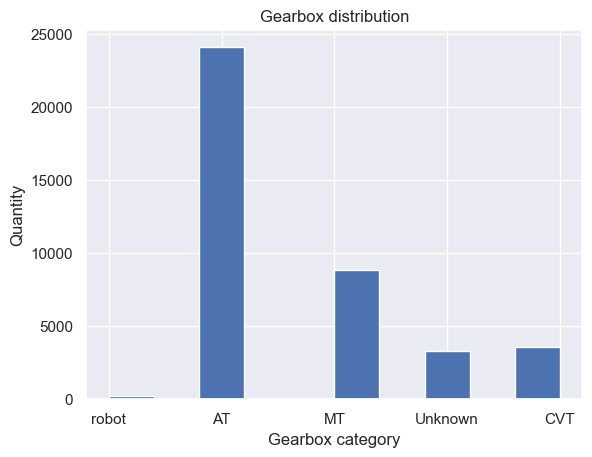

In [75]:
data['gearbox'].hist()

plt.xlabel('Gearbox category')
plt.ylabel('Quantity')
plt.title('Gearbox distribution')

plt.show()

For 'Unknown' values, I suggest replacing them with the mode value within the 'model' group for the 'gearbox' column."

In [76]:
for t in data['model'].unique():
    data.loc[(data['model'] == t) & (data['gearbox']=='Unknown'), 'gearbox'] = \
    data.loc[(data['model'] == t), 'gearbox'].mode()

In [77]:
data['gearbox'].value_counts()

AT       24095
MT        8817
CVT       3562
robot      218
Name: gearbox, dtype: int64

### Drive type

The 'drive_type' column is also filled inconsistently. Let's standardize the data to ensure uniform values.

In [78]:
data['drive_type'].value_counts().head()

4WD         9412
2 WD        5078
2WD         4678
FF          4578
Передний    3270
Name: drive_type, dtype: int64

In [79]:
data['drive_type'].isna().sum()

4289

In [80]:
data['drive_type'] = data['drive_type'].str.strip().str.lower().replace(' ', '', regex=True)


In [81]:
data['drive_type'].value_counts().head()

4wd         12019
2wd          9756
ff           4578
передний     3326
полный       1922
Name: drive_type, dtype: int64

In [82]:
def categorize_drive_type(e):
    if not isinstance(e, str):
        return 'Unknown'  # Returns the value as is if it is not a string

    dictionary = {'FWD': ['передний','2wd','ff','fwd', '4x2'],
                  'RWD': ['задний','rwd' ],
                  'AWD': ['полный','quattro','awd','4wd', '4x4','4х4','4X4','4motion' ],
                  'Unknown': ['астана', '0', '4х2.2','4х2']
                 }
    for category, words in dictionary.items():
        for word in words:
            if word in e:
                return category
    return e

In [83]:
data['drive_type_flt'] = data['drive_type'].apply(categorize_drive_type)

Missing 'drive type' values have been restored based on the 'drive type' values for identical models.

In [84]:
data.loc[31148:31149, 'drive_type'] = 'FWD'
data.loc[32670, 'drive_type'] =  'AWD'
data.loc[33070, 'drive_type'] = 'AWD'
data.loc[data['model']=='Duster', 'drive_type']= 'AWD'
data.loc[data['model']=='Sandero', 'drive_type']= 'FWD'

In [85]:
data['drive_type_flt'].value_counts().head(40)

FWD        18811
AWD        15022
Unknown     4455
RWD         1674
#н/д           4
Name: drive_type_flt, dtype: int64

The 'drive type' has been brought to a uniform format, but unfortunately, it remains 'unknown' for many cars.Т

<Axes: >

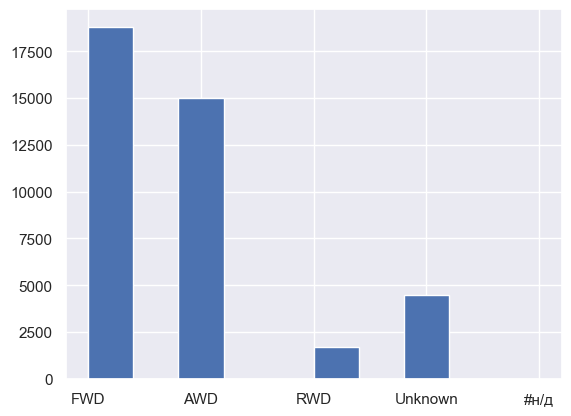

In [86]:
data['drive_type_flt'].hist()

### segmentat, segmentation_2013, class_2013, segmentation_eng

Let's leave all these columns unchanged. All of them, except for 'segment', are categorized and appear fine. The 'segment' column can serve as a source for additional information.

In [87]:
# 'segmentation_2013' has been translated to english
translation_dict = {
    'Легковые автомобили': 'Passenger cars',
    'Внедорожники': 'SUVs',
    'Коммерческие автомобили': 'Commercial vehicles',
    'Минивэны': 'Minivans',
    'Пикапы': 'Pickup trucks'
}

data['segmentation_2013'] = data['segmentation_2013'].map(translation_dict)

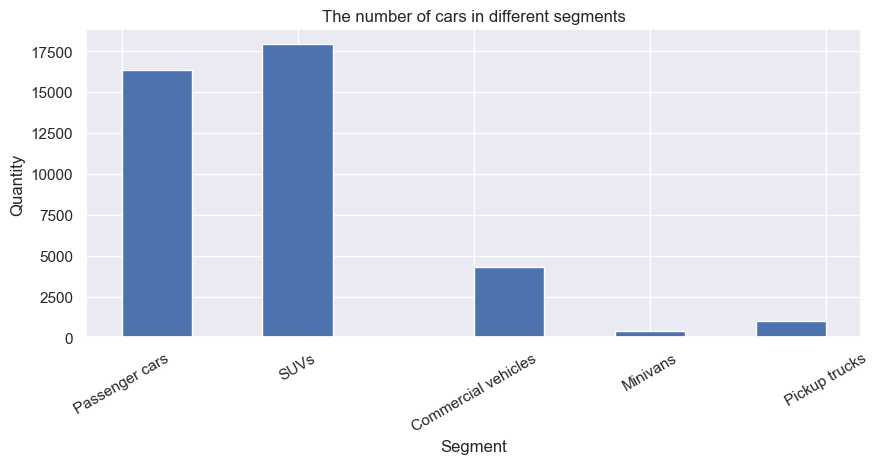

In [88]:
data['segmentation_2013'].unique()
plt.figure(figsize=(10, 4))

data['segmentation_2013'].hist()
plt.xlabel('Segment')
plt.ylabel('Quantity')
plt.title('The number of cars in different segments')
plt.xticks(rotation=30)

plt.show()

### Region

In the "region" column, the information indicates in which region the car was sold.

In [89]:
translation_dict = {
    'Алматы': 'Almaty',
    'Нур-Султан': 'Nur-Sultan',
    'Усть-Каменогорск': 'Ust-Kamenogorsk',
    'Уральск': 'Uralsk',
    'Костанай': 'Kostanay',
    'Павлодар': 'Pavlodar',
    'Семей': 'Semey',
    'Шымкент': 'Shymkent',
    'Актау': 'Aktau',
    'Атырау': 'Atyrau',
    'Актобе': 'Aktobe',
    'Караганда': 'Karaganda',
    'Петропавловск': 'Petropavlovsk',
    'Кокшетау': 'Kokshetau',
    'Рудный': 'Rudny',
    'Кызылорда': 'Kyzylorda',
    'Тараз': 'Taraz',
    'Туркестан': 'Turkestan',
    'Талдыкорган': 'Taldykorgan',
    'ЭКСПОРТ': 'Export',
    'Кульсары': 'Kulsary',
    'Каскелен': 'Kaskelen',
    'Экибастуз': 'Ekibastuz',
    'Риддер': 'Ridder',
    'Сарыагаш': 'Saryagash',
    'Зыряновск': 'Zyryanovsk'
}
data['region'] = data['region'].map(translation_dict)

In [90]:
data.region.unique()

array(['Almaty', 'Nur-Sultan', 'Ust-Kamenogorsk', 'Uralsk', 'Kostanay',
       'Pavlodar', 'Semey', 'Shymkent', 'Aktau', 'Atyrau', 'Aktobe',
       'Karaganda', 'Petropavlovsk', 'Kokshetau', 'Rudny', 'Kyzylorda',
       'Taraz', 'Turkestan', 'Taldykorgan', 'Export', 'Kulsary',
       'Kaskelen', 'Ekibastuz', 'Ridder', 'Saryagash', 'Zyryanovsk'],
      dtype=object)

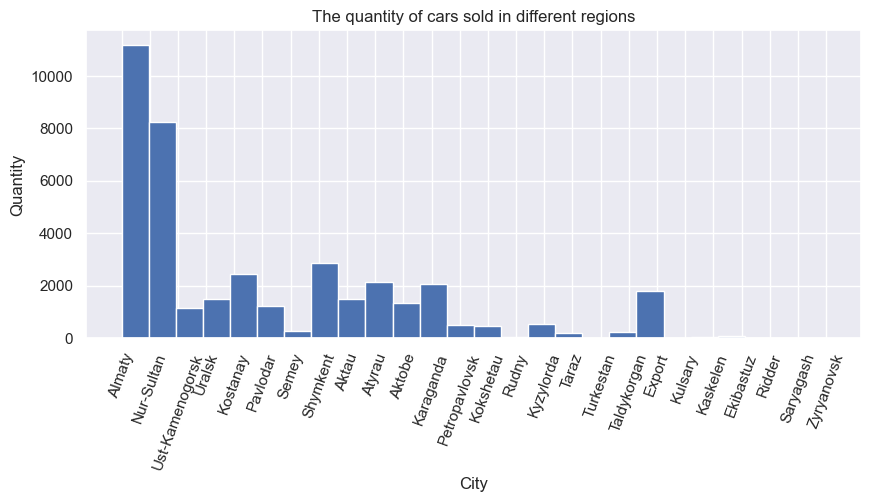

In [91]:
plt.figure(figsize=(10, 4))

data['region'].hist(bins = 26)
plt.xlabel('City')
plt.ylabel('Quantity')
plt.title('The quantity of cars sold in different regions')
plt.xticks(rotation=70)

plt.show()

### Dealership name

The column is completely filled. It is difficult to determine if this information is important for analysis. Let's leave these columns unchanged at this stage of analysis.

In [92]:
data['dealership_name'].value_counts()

Hyundai Premium Almaty    1600
Hyundai Auto Almaty       1425
Hyundai Premium Astana    1385
Тойота Центр Алматы       1343
Тойота Центр Астана       1333
                          ... 
Меридиан АВТО Актау          1
СарыаркаАвтоПром             1
Равон Моторс Костанай        1
Ford Атырау                  1
СемАЗ Кызылорда              1
Name: dealership_name, Length: 205, dtype: int64

### The quantity of sold cars

Six missing values have been detected and deleted, as well as the row with the value '-1'. The remaining rows are filled completely and correct.

In [93]:
data['quantity'].isna().sum()

6

In [94]:
data = data.dropna(subset='quantity')
data = data[data['quantity']!= -1]

In [95]:
data['quantity']  = data['quantity'].astype(int)

In [96]:
#data['quantity'].value_counts()

### Client type

In [97]:
data['client_type'].value_counts('quantity')

Физ. Лицо       0.614830
Юр. Лицо        0.197027
nan             0.176181
Корп. клиент    0.004029
ФизЛицо         0.003303
юридическое     0.002427
ЮрЛицо          0.000751
физ.лицо        0.000726
Юр.Лицо         0.000626
физическое      0.000100
Name: client_type, dtype: float64

The visualization of the distribution of purchased car quantities, depending on the customer type (company or individual), shows that, as expected, most purchases of more than one car were made by corporate customers.

In [98]:
client_type = data.pivot_table(index = 'client_type', columns = 'quantity', aggfunc ='count')

In [99]:
client_type

area                                                        \
quantity          1       2      3      4      5      6     7     8     9     
client_type                                                                   
nan            4326.0  1003.0  443.0  282.0  181.0  119.0  99.0  78.0  59.0   
Корп. клиент    161.0     NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN   
Физ. Лицо     24564.0     3.0    NaN    NaN    NaN    NaN   1.0   NaN   NaN   
ФизЛицо         132.0     NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN   
Юр. Лицо       7835.0    11.0    9.0    NaN    4.0    1.0   NaN   1.0   2.0   
Юр.Лицо          25.0     NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN   
ЮрЛицо           30.0     NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN   
физ.лицо         29.0     NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN   
физическое        4.0     NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN   
юридическое      97.0     NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN   

                    ... year_of_manufacture                                \
quantity       10   ...                 51   54   60   62   63   66   70    
client_type         ...                                                     
nan           61.0  ...                 1.0  1.0  1.0  0.0  1.0  1.0  NaN   
Корп. клиент   NaN  ...                 NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Физ. Лицо      NaN  ...                 NaN  NaN  NaN  NaN  NaN  NaN  NaN   
ФизЛицо        NaN  ...                 NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Юр. Лицо       2.0  ...                 NaN  NaN  NaN  NaN  NaN  NaN  1.0   
Юр.Лицо        NaN  ...                 NaN  NaN  NaN  NaN  NaN  NaN  NaN   
ЮрЛицо         NaN  ...                 NaN  NaN  NaN  NaN  NaN  NaN  NaN   
физ.лицо       NaN  ...                 NaN  NaN  NaN  NaN  NaN  NaN  NaN   
физическое     NaN  ...                 NaN  NaN  NaN  NaN  NaN  NaN  NaN   
юридическое    NaN  ...                 NaN  NaN  NaN  NaN  NaN  NaN  NaN   

                             
quantity      79   100  115  
client_type                  
nan           0.0  1.0  1.0  
Корп. клиент  NaN  NaN  NaN  
Физ. Лицо     NaN  NaN  NaN  
ФизЛицо       NaN  NaN  NaN  
Юр. Лицо      NaN  NaN  NaN  
Юр.Лицо       NaN  NaN  NaN  
ЮрЛицо        NaN  NaN  NaN  
физ.лицо      NaN  NaN  NaN  
физическое    NaN  NaN  NaN  
юридическое   NaN  NaN  NaN  

[10 rows x 1265 columns]

In [100]:
data['client_type'] = data['client_type'].str.strip().str.lower()

In [101]:
data['client_type'].value_counts()

физ. лицо       24568
юр. лицо         7873
nan              7040
корп. клиент      161
физлицо           132
юридическое        97
юрлицо             30
физ.лицо           29
юр.лицо            25
физическое          4
Name: client_type, dtype: int64

Let's change string value 'nan' to 'Not a number' value.

In [102]:
data['client_type'] = data['client_type'].replace('nan', np.nan)

data['client_type'].isna().sum()

7040

For starters, let's fill all NaN rows. If the 'client_type' is NaN and 'quantity' equals 1, 'client_type_cor' is 'individual'; if it's bigger than one, it's 'company'.

In [103]:
data['client_type_cor'] = data['client_type']

data.loc[(pd.isna(data['client_type'])) & (data['quantity'] == 1), 'client_type_cor'] = 'individual'
data.loc[(pd.isna(data['client_type'])) & (data['quantity'] > 1), 'client_type_cor'] = 'company'

In [104]:
data.loc[:,['client_type','quantity','client_type_cor']].head(40)

,client_type,quantity,client_type_cor
0,физ. лицо,1,физ. лицо
1,юр. лицо,1,юр. лицо
2,физ. лицо,1,физ. лицо
3,юр. лицо,1,юр. лицо
4,физ. лицо,1,физ. лицо
5,физ. лицо,1,физ. лицо
6,физ. лицо,1,физ. лицо
7,физ. лицо,1,физ. лицо
8,физ. лицо,1,физ. лицо
9,юр. лицо,1,юр. лицо


Let's translate and standart all values in 'client_type' with function 

In [105]:
def categorize_client_type(data):

    client = data['client_type_cor']
    quantity = data['quantity']

    if 'физ' in client :
        return 'individual'
    elif 'юр' in client or 'корп' in client:
        return 'company'
    else:
        return client


In [106]:
data['client_type_cor'] = data.apply(categorize_client_type, axis=1)

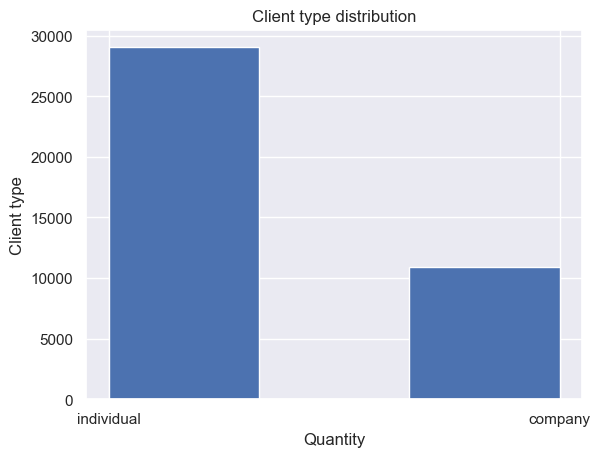

In [107]:
data['client_type_cor'].hist(bins = 3)

plt.xlabel('Quantity')
plt.ylabel('Client type')
plt.title('Client type distribution')

plt.show()

In [108]:
data.loc[:,['client_type','quantity','client_type_cor']]

,client_type,quantity,client_type_cor
0,физ. лицо,1,individual
1,юр. лицо,1,company
2,физ. лицо,1,individual
3,юр. лицо,1,company
4,физ. лицо,1,individual
...,...,...,...
39961,юр. лицо,1,company
39962,юр. лицо,1,company
39963,юр. лицо,1,company
39964,юр. лицо,1,company


In [109]:
data['client_type'] = data['client_type_cor']
data = data.drop('client_type_cor',axis=1)

### Sale usd

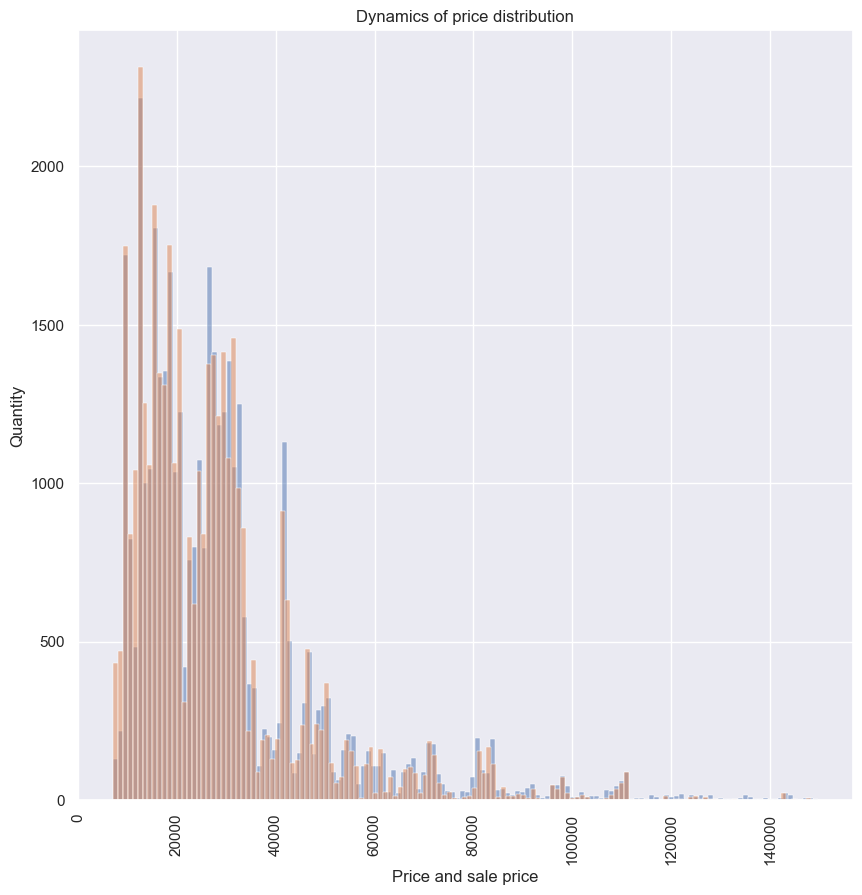

In [110]:
plt.figure(figsize=(10, 10))


sns.histplot(data=data.query('sale_usd<150000'), x="sale_usd", alpha = 0.5)
sns.histplot(data=data.query('price_usd<150000'), x="price_usd", alpha = 0.5)


plt.xlabel('Price and sale price')
plt.ylabel('Quantity')
plt.title('Dynamics of price distribution')
plt.xticks(rotation=90)

plt.show()

### The region where the car was sold


Artifacts or missing values not found.

In [111]:
data['area'].unique()

array(['г.Алматы', 'г.Нур-Султан', 'Восточно-Казахстанская область',
       'Западно-Казахстанская область', 'Костанайская область',
       'Павлодарская область', 'Южно-Казахстанская область',
       'Мангистауская область', 'Атырауская область',
       'Актюбинская область', 'Карагандинская область',
       'Северо-Казахстанская область', 'Акмолинская область',
       'Кызылординская область', 'Жамбылская область',
       'Туркестанская область', 'Алматинская область', 'Экспорт область'],
      dtype=object)

In [112]:
# regions translation
translation_dict = {
    'г.Алматы': 'Almaty city',
    'г.Нур-Султан': 'Nur-Sultan city',
    'Восточно-Казахстанская область': 'East Kazakhstan region',
    'Западно-Казахстанская область': 'West Kazakhstan region',
    'Костанайская область': 'Kostanay region',
    'Павлодарская область': 'Pavlodar region',
    'Южно-Казахстанская область': 'South Kazakhstan region',
    'Мангистауская область': 'Mangystau region',
    'Атырауская область': 'Atyrau region',
    'Актюбинская область': 'Aktobe region',
    'Карагандинская область': 'Karaganda region',
    'Северо-Казахстанская область': 'North Kazakhstan region',
    'Акмолинская область': 'Akmola region',
    'Кызылординская область': 'Kyzylorda region',
    'Жамбылская область': 'Zhambyl region',
    'Туркестанская область': 'Turkestan region',
    'Алматинская область': 'Almaty region',
    'Экспорт область': 'Export region'
}
data['area'] = data['area'].map(translation_dict)

In [113]:
data['area'].value_counts().head()

Almaty city                11177
Nur-Sultan city             8243
South Kazakhstan region     2880
Kostanay region             2494
Atyrau region               2164
Name: area, dtype: int64

## Conclusions and results of data preprocessing

In [114]:
data = data.reset_index(drop = True) # indexation restart

In [115]:
data.head()

,year,month,company,brand,model,modification,year_of_manufacture,country_of_manufacture,type_of_fuel,engine_volume_l,...,quantity,price_usd,sale_usd,area,segmentation_2013,class_2013,segmentation_eng,month_num,engine_category,drive_type_flt
0,2019,Май,Mercur Auto,Audi,A3,TFSI,2018,Германия,gasoline,1.4,...,1,28115.00,28115.00,Almaty city,Passenger cars,C класс,C,5,small,FWD
1,2019,Август,Mercur Auto,Audi,A3,TFSI,2018,Германия,gasoline,1.4,...,1,32246.99,32246.99,Almaty city,Passenger cars,C класс,C,8,small,FWD
2,2019,Апрель,Mercur Auto,Audi,A4,TFSI,2018,Германия,gasoline,1.4,...,1,32000.00,32000.00,Almaty city,Passenger cars,D класс,D,4,small,FWD
3,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,gasoline,1.4,...,1,31929.00,31929.00,Almaty city,Passenger cars,D класс,D,7,small,FWD
4,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,gasoline,1.4,...,1,31929.00,31929.00,Almaty city,Passenger cars,D класс,D,7,small,FWD


In [118]:
schape_end = data.shape[0]
lost = start_shape_rows - schape_end
percentage = round((start_shape_rows - schape_end)*100/start_shape_rows, 3)
print(f'Rows lost {lost}' )
print(f'Loss percentage {percentage}%' )

Rows lost 7
Loss percentage 0.018%


Conclysions and results 

    1. All numercal values has been transfered to float : engine_volume_l, price_usd, sale_usd.
    2. Integer quantity values converted to int.
    3. All car parammetrs and company names transfered to uniform format.
    4. Most of missing values filled by indirect evidence or was found in open sourse.
    5. Implicit duplicats corected.
    6. Columns engine_volume_l и drive_type splited by categories.
    7. The shift in columns: 'type_of_fuel', 'engine_volume_l', 'gearbox', has been detected.
    
The part of deleted rows is 0.018%.

Dataset is ready for analisis.

In [117]:
data.to_csv('/Users/Santonica/Documents/Yandex_Prakt/Мастерская/данные для проекта/auto_kz_2019_new.csv', index=False ,sep =',')
